<img src="https://raw.githubusercontent.com/LuisVelasc/Imagenes/main/CalentamientoGlobal1.PNG" alt="drawing" width="450">

Ejercicios realizados en el curso de edX **Data Science: visualization**, impartido por el profesor **Rafael Irizarry** de la Universidad de Harvard. En este notebook se revisan múltiples bases de datos que contienen información acerca de la termparatura global y las concentraciones de gases de efecto invernadero en la atmósfera a traves de los años. Las bases de datos fueron creadas por **National Oceanic and Atmospheric Administration** (NOAA) y la **Carbon Dioxide Information Analysis Center** (CDIAC).

## Bases de datos

Se comienza cargando las librerías que son necesarias para este ejercicio.

In [1]:
library(tidyverse)
library(dslabs)
library(ggplot2)

-- Attaching packages --------------------------------------- tidyverse 1.3.1 --

v ggplot2 3.3.5     v purrr   0.3.4
v tibble  3.1.4     v dplyr   1.0.7
v tidyr   1.1.3     v stringr 1.4.0
v readr   2.0.1     v forcats 0.5.1

-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()



Se utilizarán tres bases de datos diferentes. La primera contiene los registros de anomalías térmicas y emisiones de CO2 entre los años 1751 a 2018. La base de datos llamada **greenhouse_gases** almacena las concentraciones de gases de efecto invernadero en los últimos 2,000 años. La tercer base de datos tiene los registros de la concentración de CO2 en la atmósfera de los últimos 800,000 años. 

In [2]:
data(temp_carbon)
data(greenhouse_gases)
data(historic_co2)

Ahora se hace un vistaso a las variables que manejan las tres bases de datos a emplear.

In [3]:
head(temp_carbon)
head(greenhouse_gases)
head(historic_co2)

,year,temp_anomaly,land_anomaly,ocean_anomaly,carbon_emissions
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1880,-0.11,-0.48,-0.01,236
2,1881,-0.08,-0.40,0.01,243
3,1882,-0.10,-0.48,0.00,256
4,1883,-0.18,-0.66,-0.04,272
5,1884,-0.26,-0.69,-0.14,275
6,1885,-0.25,-0.56,-0.17,277


,year,gas,concentration
,<dbl>,<chr>,<dbl>
1,20,CO2,277.7
2,40,CO2,277.8
3,60,CO2,277.3
4,80,CO2,277.3
5,100,CO2,277.5
6,120,CO2,277.6


year,co2,source
<dbl>,<dbl>,<chr>
1959,315.97,Mauna Loa
1960,316.91,Mauna Loa
1961,317.64,Mauna Loa
1962,318.45,Mauna Loa
1963,318.99,Mauna Loa
1964,319.62,Mauna Loa


## Registro de emisiones de carbono

Primero creamos una serie de tiempo en la que se muestre la emisión de CO2 desde 1751 hasta el 2014, año donde termina el registro de la base de datos.

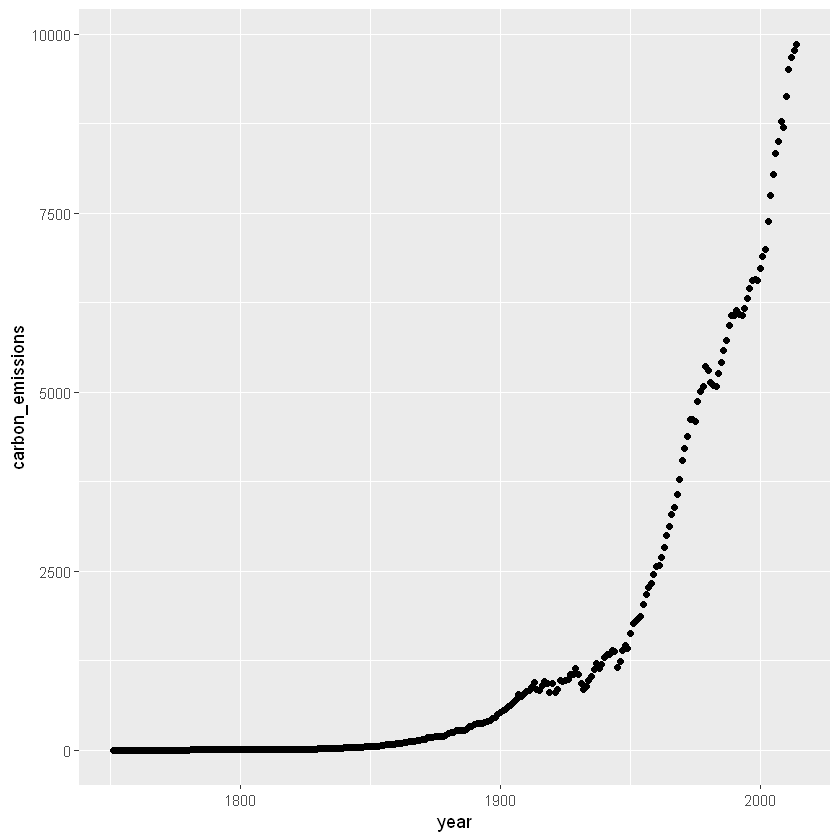

In [4]:
temp_carbon %>%
  filter(!is.na(carbon_emissions)) %>%
  ggplot(aes(year, carbon_emissions))+
  geom_point()

Para poner en contexto la magnitud con la que han crecido las emisiones de CO2 en los últimos 250 años, se determina la relación entre la emisión actual y aquel producido en el año de 1751. El resultado indica que **nuestras emisiones de CO2 se han multiplicado por 3,285** en ese periodo de tiempo.

In [5]:
# Años de observaciones
b=max(temp_carbon %>% filter(!is.na(carbon_emissions)) %>% .$year)
a=min(temp_carbon %>% filter(!is.na(carbon_emissions)) %>% .$year)

Carbon=temp_carbon %>% filter(!is.na(carbon_emissions)) %>% 
  select(year,carbon_emissions)

# Valores extremos en el intervalo
C1=Carbon[which(Carbon$year==b),] %>% .$carbon_emissions
C2=Carbon[which(Carbon$year==a),] %>% .$carbon_emissions

# Diferencia entre el primer y último año de observaciones
C1/C2

[1] 3285

## Variaciones en la temperatura

Ahora revisamos la variable **temp_anomaly** de la base de datos llamada **temp_carbon**. Esta variable registra la magnitud de las anomalías térmicas presentadas desde 1880 hasta 2018. Se observa que, a partir de la segunda mitad del siglo XX, las temératuras presentan valores anormalmente mayores. 

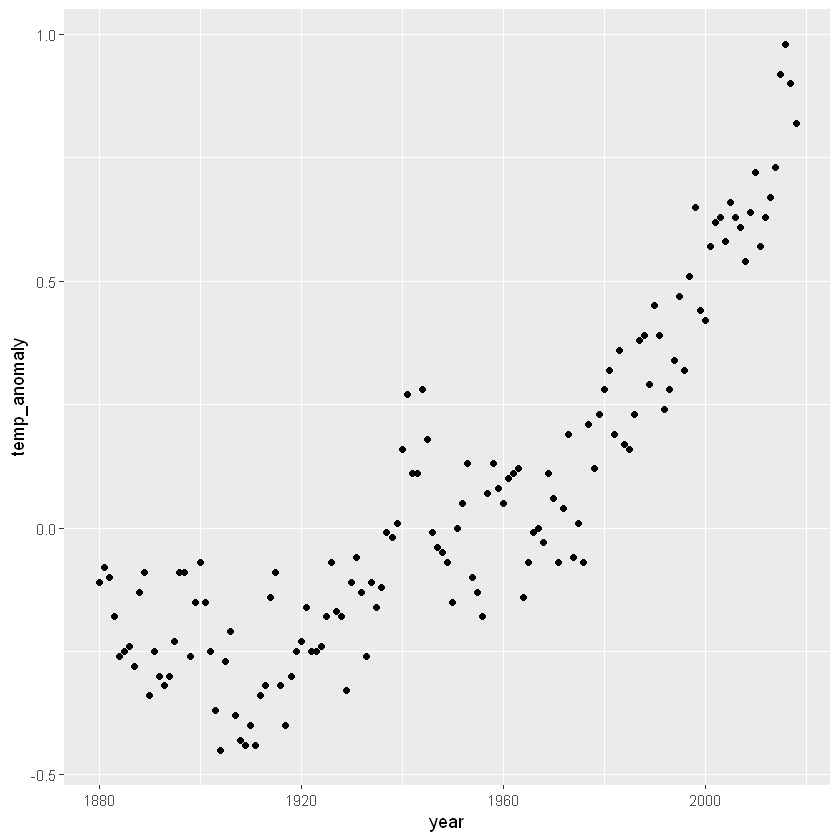

In [6]:
# Se revisa la variable temp_anomaly
temp_carbon %>%
  filter(!is.na(temp_anomaly)) %>%
  ggplot(aes(year, temp_anomaly))+
  geom_point()

Ahora se revisa cuánto ha aumentado la temperatura en los últimos 100 años. Los registros de la base de datos indica una diferencia entre las anomalías térmicas de **0.93° C**.

In [7]:
# Años de observaciones
b=max(temp_carbon %>% filter(!is.na(temp_anomaly)) %>% .$year)
a=min(temp_carbon %>% filter(!is.na(temp_anomaly)) %>% .$year)

Temp=temp_carbon %>% filter(!is.na(temp_anomaly)) %>% 
  select(year,temp_anomaly)

# Valores extremos en el intervalo
C1=Temp[which(Temp$year==b),] %>% .$temp_anomaly
C2=Temp[which(Temp$year==a),] %>% .$temp_anomaly

# Diferencia en grados entre el periodo de observación
C1-C2

[1] 0.93

Las anomalía térmicas se presentan a través de los años. Para ayudar a interpretar la gráfica se muestra una línea de color azul que representa la temperatura media del siglo XX. Se observa un incremento constante de la magnitud de las anomalías térmicas.

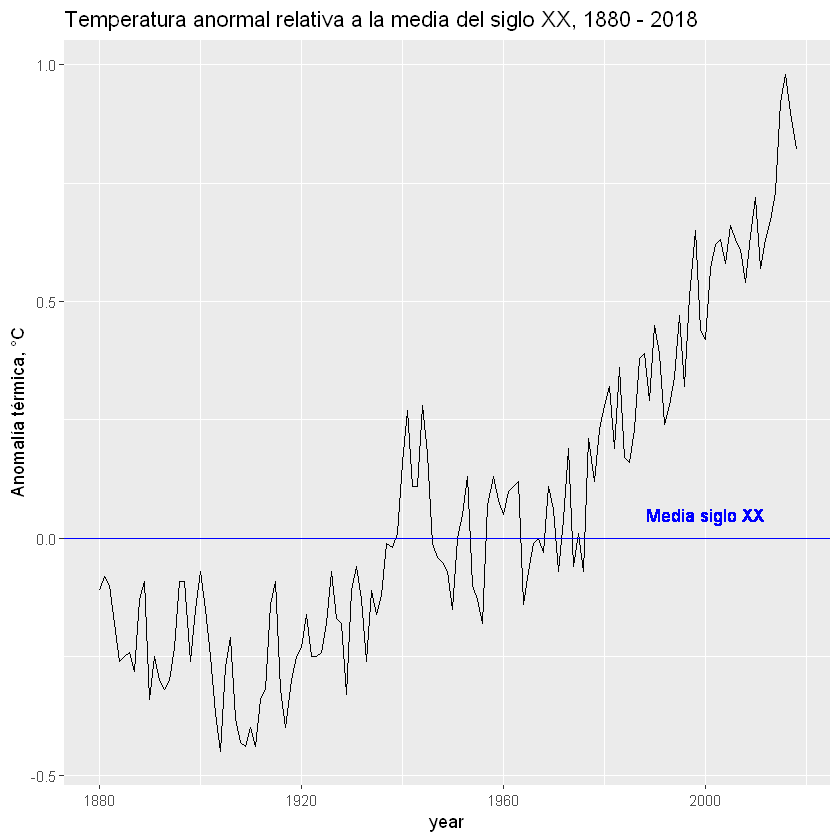

In [8]:
p=temp_carbon %>%
  filter(!is.na(temp_anomaly)) %>%
  ggplot(aes(year, temp_anomaly))+
  geom_line()

# Se agregan elementos a la gráfica
p + geom_hline(aes(yintercept = 0), col = "blue") +
  ylab("Anomalía térmica, °C") +
  ggtitle("Temperatura anormal relativa a la media del siglo XX, 1880 - 2018") +
  geom_text(aes(x = 2000, y = 0.05, label = "Media siglo XX"), col = "blue")

La base de datos tiene registros de **anomalías térmicas para los oceanos y los continentes**. Estos datos se gráfican de manera conjunta con las anomalías térmicas promedio globales. Se observa que los continentes han tenido una mayor variación en su temperatura mientras que los oceanos presentan una tendencia de seguir el promedio global.

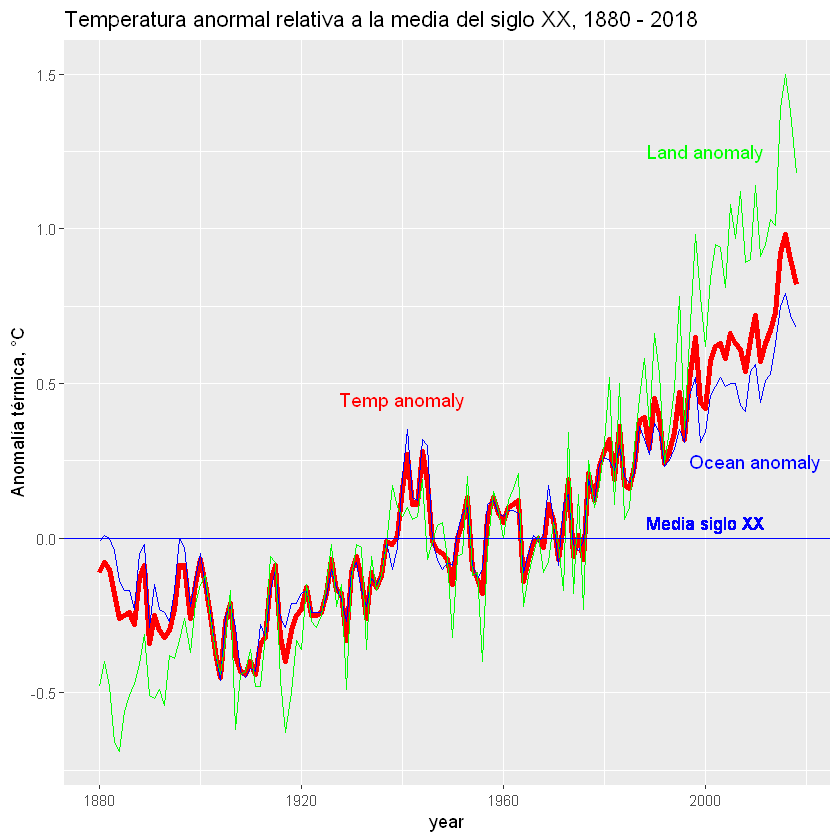

In [9]:
# Serie de tiempo para todos los datos
labels=data.frame(lab=c("Temp anomaly","Ocean anomaly","Land anomaly"),x=c(1940,2010,2000),y=c(0.45,0.25,1.25))

temp_carbon %>%
  filter(!is.na(temp_anomaly) & !is.na(land_anomaly) & !is.na(ocean_anomaly))%>%
  ggplot()+
  geom_line(aes(year,temp_anomaly,col="Temp anomaly"),size=1.5,col="Red")+
  geom_line(aes(year,ocean_anomaly,color="Ocean anomaly"),col="Blue")+
  geom_line(aes(year,land_anomaly),color="Green") +
  geom_text(data=labels,aes(x,y,label=lab),size=4,col=c("red","blue","green"))+
  geom_hline(aes(yintercept = 0), col = "blue")+
  ylab("Anomalía térmica, °C") +
  ggtitle("Temperatura anormal relativa a la media del siglo XX, 1880 - 2018") +
  geom_text(aes(x = 2000, y = 0.05, label = "Media siglo XX"), col = "blue")


## Concentraciones de gases de efecto invernadero

Ahora graficamos las concentraciones de tres gases de efecto invernadero: CH4, CO2 y N2O; los valores se encuentran en CO2 equivalente. Las gráficas se complementan con una línea vertical azul que representa el año de 1850, es decir, cuando se considera que comenzó la revolución industrial. Se observa que el CH4 ha incrementado su concentración en más del doble, adicionalmente todos los gases han incrementado sus concentraciones y han crecido de manera exponencial desde 1850. Por último, la concentración de N2O es la que ha crecido menos de los tres gases estudiados.

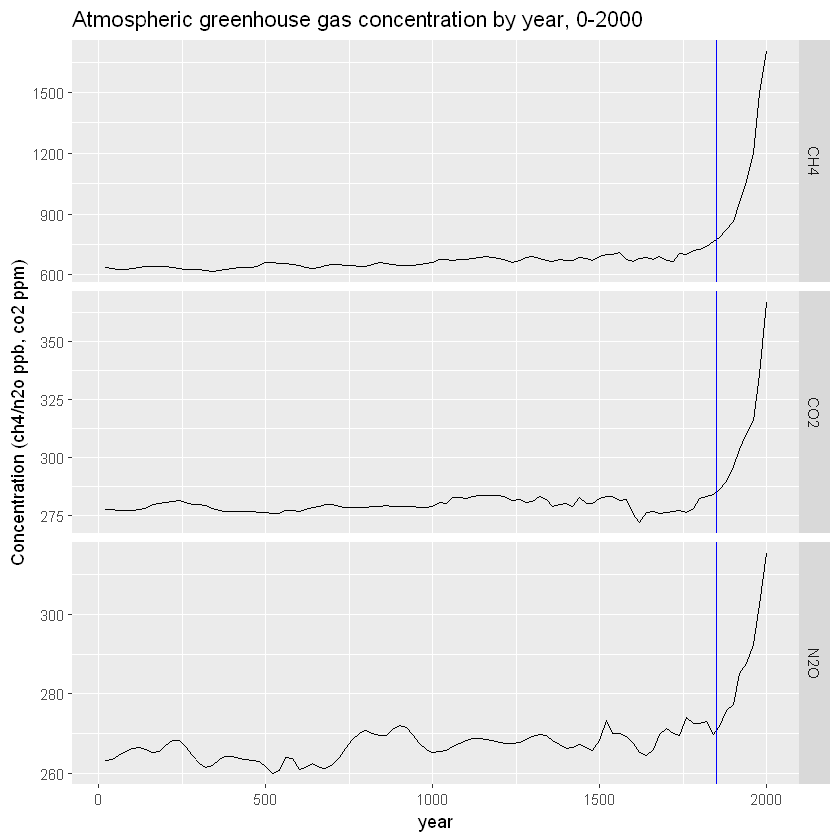

In [10]:
greenhouse_gases %>% group_by(gas) %>%
  ggplot(aes(year,concentration)) +
  geom_line() +
  facet_grid(gas~., scales = "free") +
  geom_vline(aes(xintercept = 1850), col = "blue")+
  ylab("Concentration (ch4/n2o ppb, co2 ppm)") +
  ggtitle("Atmospheric greenhouse gas concentration by year, 0-2000")

Ahora nos enfocamos en las emisiones de CO2, la serie de tiempo indica que las emisiones de carbon fueron practicamente cero antes de 1850, por otra parte, las emisiones de carbono en 2014 fueron 4 veces el CO2 emitido en el año de 1960.

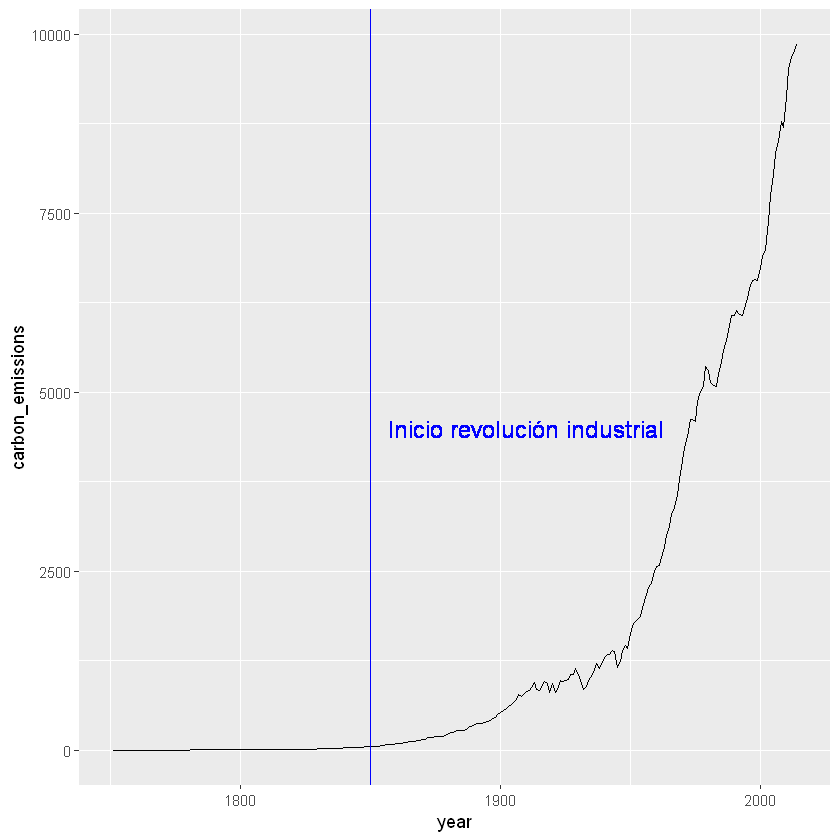

In [11]:
temp_carbon %>% 
  filter(!is.na(carbon_emissions)) %>%
  ggplot(aes(year,carbon_emissions))+
  geom_line()+  
  geom_vline(aes(xintercept = 1850), col = "blue")+
  geom_text(aes(x = 1910, y = 4500, label = "Inicio revolución industrial"), col = "blue", size=5)

## Variación histórica de la concentración de CO2

La base de datos llamada **historic_co2** contiene la concentración de CO2 atmosférico de los últimos 800,000 años. Usaremos estos datos para estudiar cómo ha cambiado la concentración de este gas en periodos largos de tiempo. La serie de tiempo demuestra que han existido ciclos naturales de incremento y decresión de concentraciones de CO2, asímismo se observa que se requiere más tiempo para que la concentración de CO2 disminuya que para que se incremente.

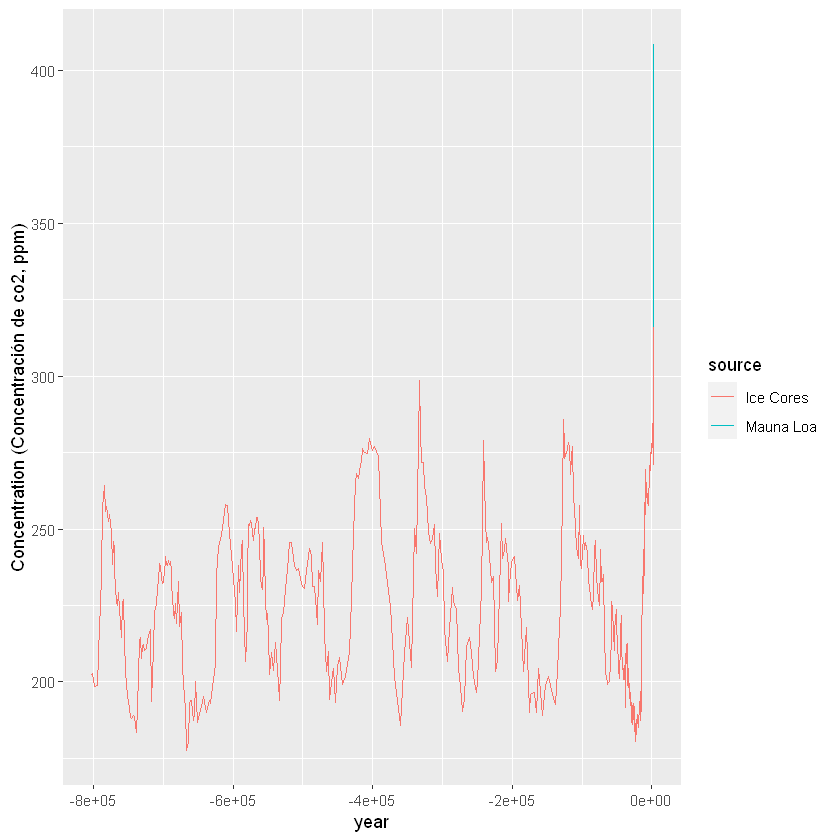

In [12]:
CO2_plot=historic_co2 %>%
  filter(!is.na(co2)) %>%
  ggplot(aes(year,co2,col=source))+
  geom_line()+
  ylab("Concentration (Concentración de co2, ppm)")

CO2_plot

Realizaremos algunos zooms en la gráfica. Si el incremento en la concentración de CO2 fuera lento, las especies tendrían tiempo de adaptarse. En los siguientes acercamientos en la serie de tiempo se observa que historicamente los incrementos en la concentración de CO2 han tardado miles de años en ocurrir, sin emabrgo, el último incremento ha ocurrido en apenas un par de cientos de años. Por lo tanto, resulta claro que los humanos son responsables de dicho incremento de CO2.

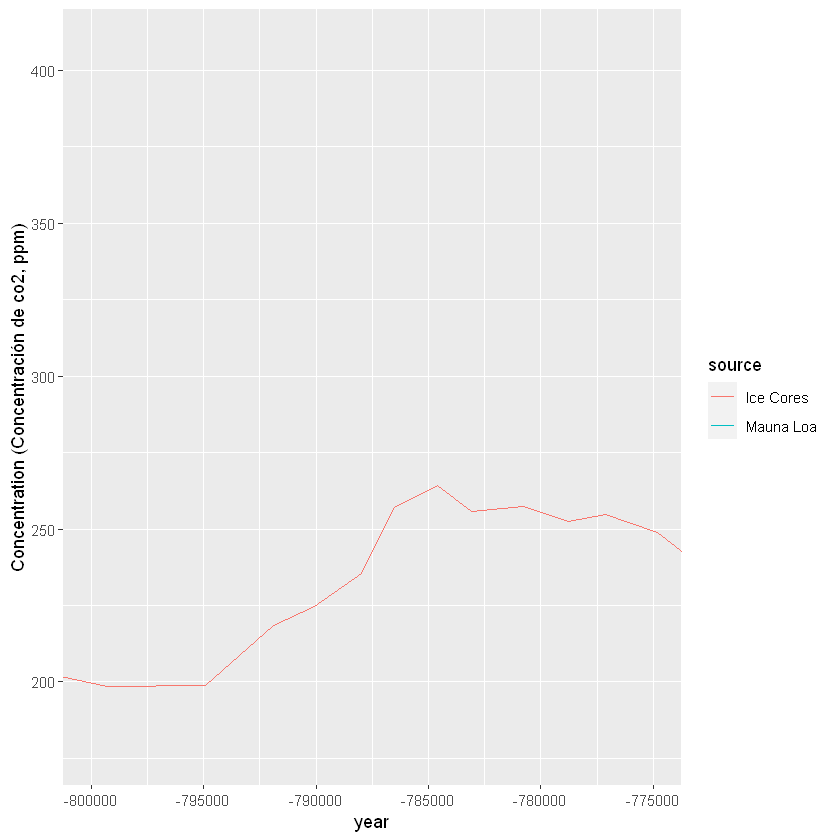

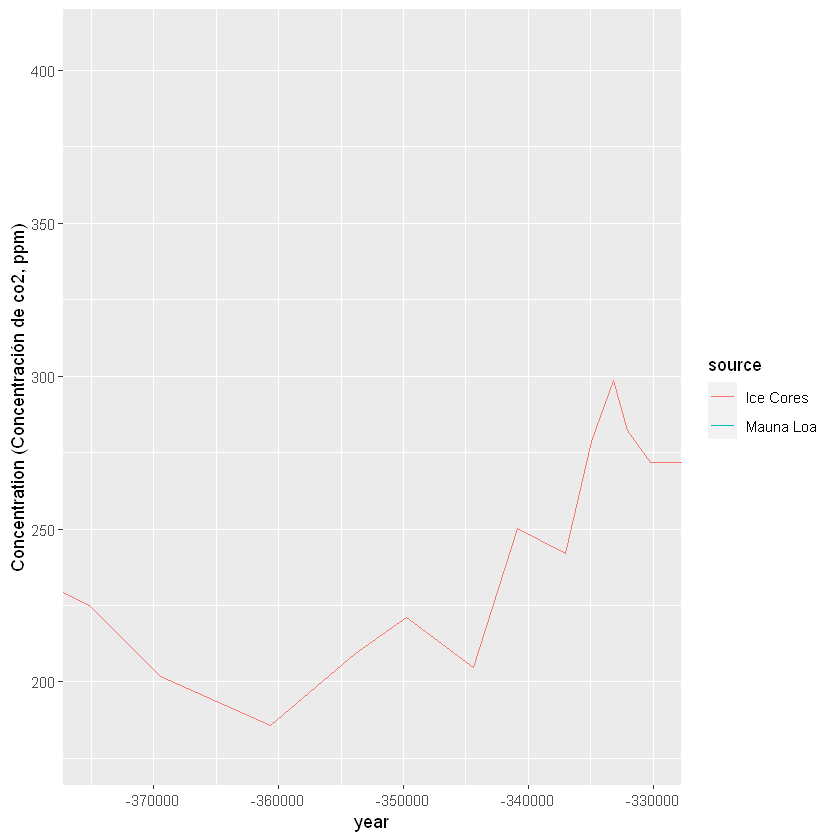

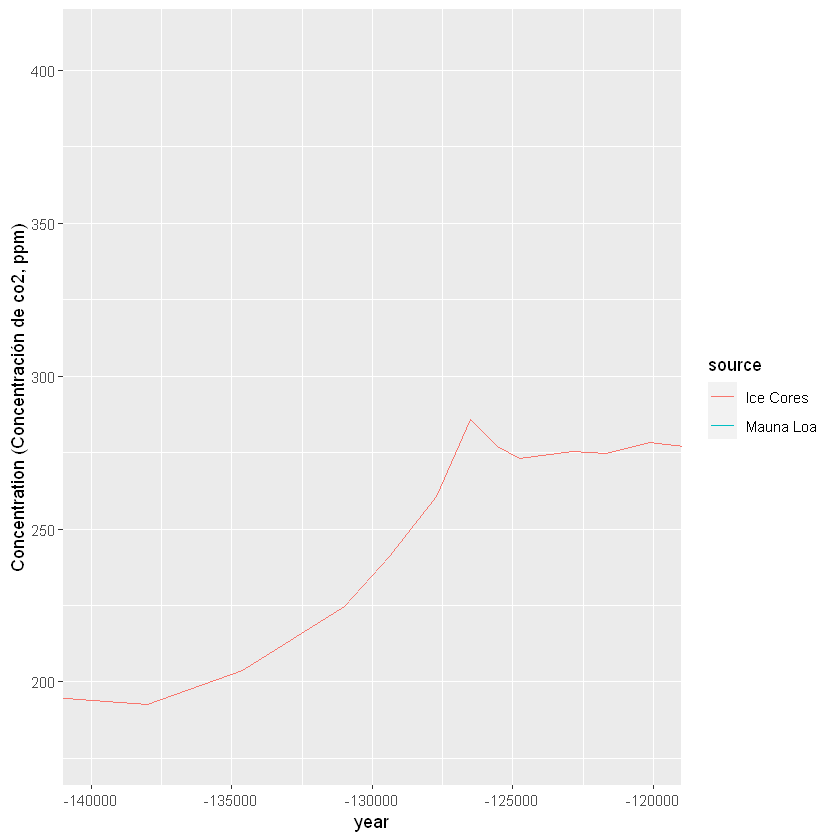

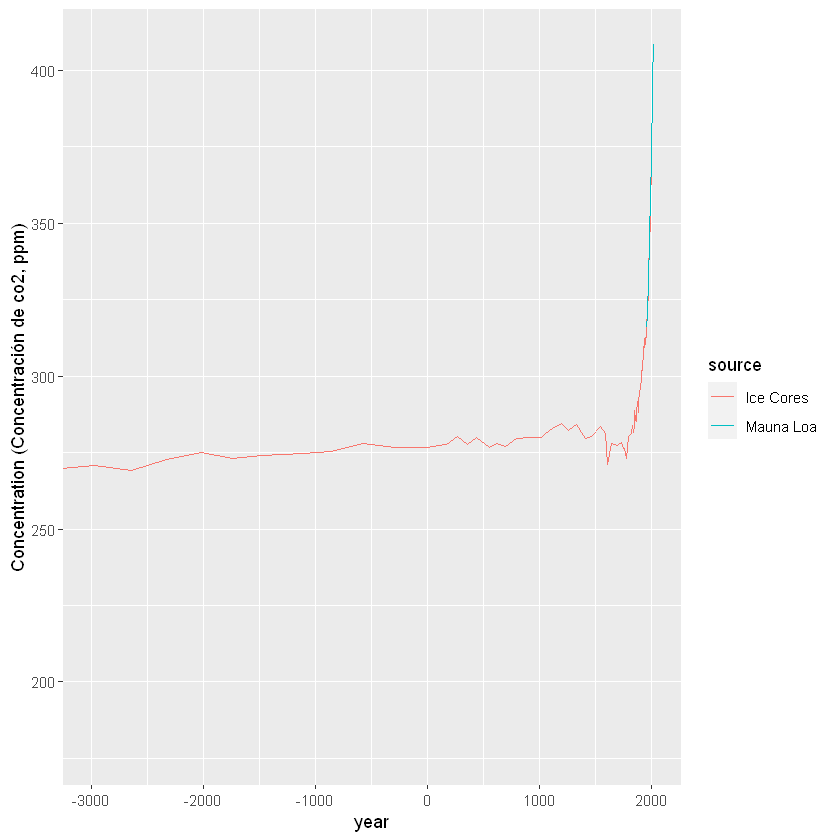

In [13]:
CO2_plot + coord_cartesian(xlim=c(-800000,-775000))
CO2_plot + coord_cartesian(xlim=c(-375000,-330000))
CO2_plot + coord_cartesian(xlim=c(-140000,-120000))
CO2_plot + coord_cartesian(xlim=c(-3000,2018))